<div style="text-align: right;">
-kngbq
</div>


In [5]:
#!pip install mininet
#!pip install matplotlib
#!pip install pandas
#!pip install networkx
#!pip install protobuf
#!pip show p4runtime
!pip show p4runtime
#!pip list


Name: p4runtime
Version: 1.4.1
Summary: Python bindings for P4Runtime protocol
Home-page: https://github.com/p4lang/p4runtime
Author: P4 API Working Group
Author-email: p4-api@lists.p4.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: googleapis-common-protos, grpcio, protobuf
Required-by: 


In [2]:
import subprocess
import sys
import pkg_resources

# List of common P4 dependencies
dependencies = [
    ('p4runtime', '1.4.1.post3+ga41e728'),  # Adjust this version as needed
    ('grpcio', '1.68.1'),  # Required for P4Runtime
    ('protobuf', '5.29.1'),  # Required for P4Runtime
    ('googleapis-common-protos', '1.66.0'),  # Required for P4Runtime
    ('mininet', '2.3.0d9'),  # If you're using Mininet for network emulation
    ('p4c', None),  # P4 compiler, typically not installable via pip
    ('behavioral-model', None),  # BMv2 for simulation, not pip-installable
]

def check_and_install_dependencies(dependencies):
    for pkg, version in dependencies:
        try:
            # Check if package is installed
            dist = pkg_resources.get_distribution(pkg)
            if version and dist.version != version:
                print(f"{pkg} is installed but not the required version. Found: {dist.version}, Expected: {version}")
            else:
                print(f"{pkg} is installed, version: {dist.version}")
        except pkg_resources.DistributionNotFound:
            print(f"{pkg} is not installed. Installing...")
            try:
                subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])
                print(f"Successfully installed {pkg}.")
            except subprocess.CalledProcessError:
                print(f"Failed to install {pkg}. Manual installation might be required.")

# Run the function to check and install dependencies
check_and_install_dependencies(dependencies)


/tmp/ipykernel_23371/2178831887.py:3: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


p4runtime is installed but not the required version. Found: 1.3.0, Expected: 1.4.1.post3+ga41e728
grpcio is installed but not the required version. Found: 1.70.0, Expected: 1.68.1
protobuf is installed but not the required version. Found: 3.20.3, Expected: 5.29.1
googleapis-common-protos is installed but not the required version. Found: 1.67.0, Expected: 1.66.0
mininet is installed but not the required version. Found: 2.3.0.dev6, Expected: 2.3.0d9
p4c is not installed. Installing...


ERROR: Could not find a version that satisfies the requirement p4c (from versions: none)
ERROR: No matching distribution found for p4c


Failed to install p4c. Manual installation might be required.
behavioral-model is not installed. Installing...
Failed to install behavioral-model. Manual installation might be required.


ERROR: Could not find a version that satisfies the requirement behavioral-model (from versions: none)
ERROR: No matching distribution found for behavioral-model


In [3]:
import subprocess

def check_simple_switch():
    try:
        # Run simple_switch with a version flag or help to see if it's installed correctly
        result = subprocess.run(['simple_switch', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        if result.returncode == 0:
            print("simple_switch is installed.")
            print("Output:", result.stdout)
        else:
            print("simple_switch is not installed or configured properly.")
            print("Error:", result.stderr)
    except FileNotFoundError:
        print("simple_switch is not found on the system.")
        
# Check if simple_switch is available
check_simple_switch()


simple_switch is installed.
Output: 1.15.0-892c4219



In [4]:
import p4runtime
import pkg_resources
# Get the version of p4runtime
p4runtime_version = pkg_resources.get_distribution("p4runtime").version
print(f"P4Runtime version: {p4runtime_version}")

import sys
sys.path.append('/home/ubuntu/p4runtime/py/p4/v1')


ModuleNotFoundError: No module named 'p4runtime'

In [5]:
import sys
import subprocess
import json
import grpc
import sys
print("syspath:\n",sys.path,"\n")
print("sysexec:\n",sys.executable,"\n")


syspath:
 ['/home/ubuntu/miniconda3/envs/p4dev/lib/python38.zip', '/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8', '/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/lib-dynload', '', '/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages', '/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages/IPython/extensions', '/root/.ipython', '/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages/setuptools/_vendor', '/home/ubuntu/p4runtime/py/p4/v1'] 

sysexec:
 /home/ubuntu/miniconda3/envs/p4dev/bin/python 



In [6]:
import subprocess

# Check if Mininet is running (search for mininet or ovs-vswitchd processes)
def check_mininet_status():
    try:
        # Run a command to list the processes and check if Mininet or OVS is running
        result = subprocess.run(['ps', 'aux'], capture_output=True, text=True)
        if 'mininet' in result.stdout or 'ovs-vswitchd' in result.stdout:
            print("Mininet or Open vSwitch is currently running.")
        else:
            print("Mininet or Open vSwitch is not running.")
    except Exception as e:
        print(f"Error while checking Mininet status: {e}")

check_mininet_status()

# Check how many times Mininet was initialized within the notebook by checking kernel usage
import os
from collections import Counter

def check_mininet_initializations():
    # Track the count of mininet-related imports or initializations
    mininet_processes = [line.strip() for line in open('/proc/self/cmdline').readlines() if 'mininet' in line]
    print(f"Mininet has been opened {len(mininet_processes)} times in this session.")
    
# Check if Mininet was initialized
check_mininet_initializations()


Mininet or Open vSwitch is currently running.
Mininet has been opened 0 times in this session.


In [7]:
import os
import sys
import subprocess

def ensureRoot():
    if os.getuid() != 0:
        print("*** Mininet must run as root.\n")
        sys.exit(1)
    else:
        print("*** Mininet runs as root!\n")
    return

# Ensure the script is running as root
ensureRoot()

# Checking P4 compiler (p4c)
try:
    result = subprocess.run(["p4c", "--version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode == 0:
        print("P4 Compiler is installed. \n Version:")
        print(result.stdout, "")
    else:
        print("P4 Compiler is not installed properly. Error:")
        print(result.stderr)
except FileNotFoundError:
    print("P4 Compiler is not installed or not in PATH.\n")

# Checking BMv2 (Behavioral Model v2)
try:
    result = subprocess.run(["simple_switch", "--version"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode == 0:
        print("BMv2 is installed. \nVersion:")
        print(result.stdout, "")
    else:
        print("BMv2 is not installed properly. Error:")
        print(result.stderr)
except FileNotFoundError:
    print("BMv2 is not installed or not in PATH.\n")

# Check if Open vSwitch (OVS) is installed
try:
    result = subprocess.run(['ovs-vsctl', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode == 0:
        print("Open vSwitch is installed. \n")
        print("Version:", result.stdout.decode())

        # Run 'sudo ovs-vsctl show' to display Open vSwitch configuration
        result_show = subprocess.run(['sudo', 'ovs-vsctl', 'show'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        if result_show.returncode == 0:
            print("\nOpen vSwitch Configuration:")
            print(result_show.stdout.decode())
        else:
            print("\nFailed to retrieve Open vSwitch configuration.")
            print(result_show.stderr.decode())

    else:
        print("Open vSwitch is not installed.")
except FileNotFoundError:
    print("Open vSwitch command not found. It may not be installed.\n")

# Check if Mininet is installed
try:
    result = subprocess.run(['mn', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode == 0:
        print("Mininet is installed. \n")
        print("Version:", result.stdout.decode())
    else:
        print("Mininet is not installed.")
except FileNotFoundError:
    print("Mininet command not found. It may not be installed.\n")

# Check for available Mininet controllers
try:
    result = subprocess.run(['mn', '--help'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode == 0:
        print("\nAvailable Mininet controllers:")
        if 'RemoteController' in result.stdout:
            print("RemoteController is available")
        if 'OVSController' in result.stdout:
            print("OVSController is available")
        if 'Controller' in result.stdout:
            print("Default Controller is available")
    else:
        print("Error checking Mininet controllers.")
        print(result.stderr)
except FileNotFoundError:
    print("Mininet command not found. Cannot check for controllers.\n")

# Check for available Mininet switches
try:
    result = subprocess.run(['mn', '--help'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode == 0:
        print("\nAvailable Mininet switches:")
        if 'OVSSwitch' in result.stdout:
            print("OVSSwitch is available")
        if 'P4Switch' in result.stdout:
            print("P4Switch is available")
        if 'MultiSwitch' in result.stdout:
            print("MultiSwitch is available")
    else:
        print("Error checking Mininet switches.")
        print(result.stderr)
except FileNotFoundError:
    print("Mininet command not found. Cannot check for switches.\n")

import subprocess
import pkg_resources

# Check if p4runtime package is installed via pkg_resources
try:
    p4runtime_version = pkg_resources.get_distribution("p4runtime").version
    print(f"P4Runtime Python package version: {p4runtime_version}")
except pkg_resources.DistributionNotFound:
    print("P4Runtime Python package is not installed.\n")

# Check if P4Runtime command-line tool is available
try:
    result = subprocess.run(['p4runtime', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    if result.returncode == 0:
        print("P4Runtime command-line tool is installed. \n Version:")
        print(result.stdout.strip(), "")
    else:
        print("P4Runtime command-line tool is not working properly. Error:")
        print(result.stderr)
except FileNotFoundError:
    print("P4Runtime command-line tool is not installed or not in PATH.\n")


# Check for availability of other necessary components like link utilities
try:
    result = subprocess.run(['tc', 'qdisc'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode == 0:
        print("Traffic control (tc) is available for link management.")
    else:
        print("Traffic control (tc) is not available.")
except FileNotFoundError:
    print("Traffic control (tc) is not found. It may not be installed.\n")

def check_simple_switch():
    try:
        # Run simple_switch with a version flag or help to see if it's installed correctly
        result = subprocess.run(['simple_switch', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        
        if result.returncode == 0:
            print("simple_switch is installed.")
            print("Version:", result.stdout)
        else:
            print("simple_switch is not installed or configured properly.")
            print("Error:", result.stderr)
    except FileNotFoundError:
        print("simple_switch is not found on the system.")
        
# Check if simple_switch is available
check_simple_switch()


*** Mininet runs as root!

P4 Compiler is installed. 
 Version:
p4c 1.2.5.1 (SHA: 650af7ed7 BUILD: Release)
 
BMv2 is installed. 
Version:
1.15.0-005c6cf0
 
Open vSwitch is installed. 

Version: ovs-vsctl (Open vSwitch) 3.3.0
DB Schema 8.5.0


Open vSwitch Configuration:
1bd1a4c7-6593-4000-9881-b7e1b725812d
    Bridge s1
        Controller "ptcp:6654"
        Controller "tcp:127.0.0.1:6653"
        fail_mode: secure
        Port s1-eth2
            Interface s1-eth2
                error: "could not open network device s1-eth2 (No such device)"
        Port s1
            Interface s1
                type: internal
        Port s1-eth1
            Interface s1-eth1
                error: "could not open network device s1-eth1 (No such device)"
    ovs_version: "3.3.0"

Mininet is installed. 

Version: 

Available Mininet controllers:
RemoteController is available
OVSController is available
Default Controller is available

Available Mininet switches:
OVSSwitch is available
P4Runtime Pyt

In [8]:
### Mininet run

####  Initialize and Start the Network

In [9]:
from mininet.node import Controller
from mininet.net import Mininet
from mininet.node import OVSSwitch
from mininet.cli import CLI
from mininet.link import TCLink
from mininet.util import dumpNodeConnections
from mininet.node import OVSController  # Import OVSController for Open vSwitch

def initialize_network():
    global net
    # Use OVS controller explicitly by specifying OVSController
    net = Mininet(topo=None, controller=OVSController, build=False)

    # Add the OVS controller
    net.addController('c0')

    # Add hosts with IP addresses
    h1 = net.addHost('h1', ip='10.0.0.1/24')  # Host 1 with IP 10.0.0.1
    h2 = net.addHost('h2', ip='10.0.0.2/24')  # Host 2 with IP 10.0.0.2

    # Add Open vSwitch
    s1 = net.addSwitch('s1', cls=OVSSwitch)

    # Add links between hosts and switch with bandwidth limit
    net.addLink(h1, s1, cls=TCLink, bw=10)  # 10 Mbps link
    net.addLink(h2, s1, cls=TCLink, bw=10)  # 10 Mbps link

    # Build and start the network
    net.build()
    net.start()

    print("Network initialized and started.")
    dumpNodeConnections(net.hosts)

    # Start the Mininet CLI interface
    CLI(net)

# Re-run the initialization
initialize_network()


h1 h1-eth0:s1-eth1
h2 h2-eth0:s1-eth2


Network initialized and started.


mininet>  pingall


*** Ping: testing ping reachability
h1 -> h2 
h2 -> h1 
*** Results: 0% dropped (2/2 received)


mininet>  h1 ping h2


PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.
64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=0.217 ms
64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=0.055 ms
64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=0.051 ms
64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=0.055 ms
64 bytes from 10.0.0.2: icmp_seq=5 ttl=64 time=0.055 ms
64 bytes from 10.0.0.2: icmp_seq=6 ttl=64 time=0.052 ms

--- 10.0.0.2 ping statistics ---
6 packets transmitted, 6 received, 0% packet loss, time 5134ms
rtt min/avg/max/mdev = 0.051/0.080/0.217/0.060 ms


mininet>  exit


#### Interact with the Network

In [12]:
def run_ping_test():
    global net
    if net is None:
        print("Network is not initialized. Please run the initialization code first.")
        return

    h1 = net.get('h1')  # Get host h1
    h2 = net.get('h2')  # Get host h2

    print("Testing network connectivity:")
    ping_result = h1.cmd('ping -c 4 10.0.0.2')  # Ping h2 from h1
    print(ping_result)

# Run a ping test
run_ping_test()


Testing network connectivity:
PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.
64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=5.45 ms
64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=0.396 ms
64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=0.067 ms
64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=0.059 ms

--- 10.0.0.2 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3088ms
rtt min/avg/max/mdev = 0.059/1.493/5.450/2.288 ms



#### Interact with the CLI

In [13]:
from mininet.cli import CLI

def start_cli():
    global net
    if net is None:
        print("Network is not initialized. Please run the initialization code first.")
        return

    print("Starting Mininet CLI.")
    CLI(net)

# Start the CLI
start_cli()


Starting Mininet CLI.


mininet>  nodes


available nodes are: 
c0 h1 h2 s1


mininet>  links


h1-eth0<->s1-eth1 (OK OK) 
h2-eth0<->s1-eth2 (OK OK) 


mininet>  dpctl dump-flows


*** s1 ------------------------------------------------------------------------
 cookie=0x0, duration=18.356s, table=0, n_packets=0, n_bytes=0, idle_timeout=60, priority=1,arp,in_port="s1-eth2",vlan_tci=0x0000/0x1fff,dl_src=be:ea:0f:64:fc:ed,dl_dst=4e:b3:b7:a0:5a:6b,arp_spa=10.0.0.2,arp_tpa=10.0.0.1,arp_op=2 actions=output:"s1-eth1"
 cookie=0x0, duration=13.030s, table=0, n_packets=0, n_bytes=0, idle_timeout=60, priority=1,arp,in_port="s1-eth2",vlan_tci=0x0000/0x1fff,dl_src=be:ea:0f:64:fc:ed,dl_dst=4e:b3:b7:a0:5a:6b,arp_spa=10.0.0.2,arp_tpa=10.0.0.1,arp_op=1 actions=output:"s1-eth1"
 cookie=0x0, duration=13.029s, table=0, n_packets=0, n_bytes=0, idle_timeout=60, priority=1,arp,in_port="s1-eth1",vlan_tci=0x0000/0x1fff,dl_src=4e:b3:b7:a0:5a:6b,dl_dst=be:ea:0f:64:fc:ed,arp_spa=10.0.0.1,arp_tpa=10.0.0.2,arp_op=2 actions=output:"s1-eth2"
 cookie=0x0, duration=18.355s, table=0, n_packets=3, n_bytes=294, idle_timeout=60, priority=1,icmp,in_port="s1-eth1",vlan_tci=0x0000/0x1fff,dl_src=4e:b3:b7

mininet>  h1 ping h2


PING 10.0.0.2 (10.0.0.2) 56(84) bytes of data.
64 bytes from 10.0.0.2: icmp_seq=1 ttl=64 time=0.317 ms
64 bytes from 10.0.0.2: icmp_seq=2 ttl=64 time=0.057 ms
64 bytes from 10.0.0.2: icmp_seq=3 ttl=64 time=0.057 ms
64 bytes from 10.0.0.2: icmp_seq=4 ttl=64 time=0.055 ms

--- 10.0.0.2 ping statistics ---
4 packets transmitted, 4 received, 0% packet loss, time 3087ms
rtt min/avg/max/mdev = 0.055/0.121/0.317/0.112 ms


mininet>  exit


### Increasing the Resources

In [14]:
import time
import numpy as np
import pandas as pd
from mininet.net import Mininet
from mininet.util import dumpNodeConnections
from mininet.node import Controller, OVSSwitch, OVSController
from mininet.link import TCLink
from mininet.cli import CLI
import re
import networkx as nx
import matplotlib.pyplot as plt
from mininet.log import setLogLevel, info

# Global telemetry data dictionary (ensure it's outside functions)
telemetry_data = {"Metric": [], "Scenario": [], "Value": []}

def visualize_network(net):
    """Visualize and print the network topology in a graph."""
    G = nx.Graph()

    # Add nodes to the graph (hosts and switches)
    for host in net.hosts:
        G.add_node(host.name)
    for switch in net.switches:
        G.add_node(switch.name)

    # Add edges (links) between nodes
    for link in net.links:
        G.add_edge(link.intf1.node.name, link.intf2.node.name)

    # Print all edges in the network
    edges = G.edges()
    print("Edges in the network:")
    for edge in edges:
        print(edge)

    # Visualize the network
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=10)
    plt.show()

def print_switch_resources(switch):
    """Display detailed resource information for switches."""
    print(f"Resources for {switch.name}:")
    
    # Retrieve a list of interfaces and their details
    interfaces_stats_str = switch.cmd("ovs-vsctl list interface")
    interface_dict = parse_interface_stats(interfaces_stats_str)
    print(type(interface_dict))    
    print(type(interfaces_stats_str))
    print(interfaces_stats_str[0:100])

def parse_interface_stats(interfaces_stats_str):
    """Parse the interface statistics from the string output."""
    interface_dict = {}

    # Split the output by lines
    lines = interfaces_stats_str.strip().split('\n')

    # Regex pattern to capture interface details
    interface_pattern = re.compile(r'^\| name\s+:\s+"(.*?)"')
    stats_pattern = re.compile(r'^\| (\w+)\s+:\s+(.*)')

    current_interface = None
    current_stats = {}

    for line in lines:
        # Match interface name
        match_interface = interface_pattern.match(line)
        if match_interface:
            # If we were collecting stats for a previous interface, store them
            if current_interface:
                interface_dict[current_interface] = current_stats
            # Start collecting stats for the new interface
            current_interface = match_interface.group(1)
            current_stats = {}

        # Match the statistics for the interface
        match_stats = stats_pattern.match(line)
        if match_stats:
            current_stats[match_stats.group(1)] = match_stats.group(2).strip()

    # Add the last interface's stats to the dictionary
    if current_interface:
        interface_dict[current_interface] = current_stats

    return interface_dict

def log_telemetry(metric, scenario, value):
    """Logs telemetry data for monitoring purposes."""
    telemetry_data["Metric"].append(metric)
    telemetry_data["Scenario"].append(scenario)
    telemetry_data["Value"].append(value)
    
    # Debugging: print telemetry data to confirm it's being logged
    print(f"Telemetry Logged: Metric={metric}, Scenario={scenario}, Value={value}")
    print("Current Telemetry Data:", telemetry_data)

def print_host_resources(host):
    """Print CPU, memory, and network stats for a given host."""
    print(f"Resources for Host {host.name}:")
    
    # CPU usage
    print(f"CPU Usage (top):\n{host.cmd('top -n 1 -b | head -n 10')}")
    
    # Memory usage
    print(f"Memory Usage (free):\n{host.cmd('free -h')}")
    
    # Network usage
    print(f"Network Stats (ifstat):\n{host.cmd('ifstat -i ' + host.name + '-eth0 1 1')}")

def parse_ping_result(ping_result):
    """Parse the result of a ping command and extract the average ping time."""
    try:
        # Find the line containing 'time=' and extract the ping time
        time_line = [line for line in ping_result.splitlines() if "time=" in line]
        if time_line:
            # Extract the time value in ms from the last line
            avg_ping_time = float(time_line[-1].split("time=")[-1].split()[0])
        else:
            raise ValueError("No ping time found in the result.")
    except Exception as e:
        print(f"Error extracting ping result: {e}")
        avg_ping_time = np.nan  # Return NaN if parsing fails
    return avg_ping_time

def parse_iperf_throughput(iperf_output):
    """
    Parse throughput value (Mbits/sec) from iperf command output.
    
    Args:
        iperf_output (str): Output of iperf command.
        
    Returns:
        float: Throughput in Mbits/sec or None if not found.
    """
    try:
        # Find the last occurrence of throughput result
        lines = iperf_output.strip().split('\n')
        for line in reversed(lines):
            if "Mbits/sec" in line:
                throughput = float(line.split()[-2])  # Extract the value before "Mbits/sec"
                return throughput
        print("Warning: No throughput data found in iperf output.")
        return None
    except Exception as e:
        print(f"Error parsing iperf result: {e}")
        return None



h1 h1-eth0:s1-eth1
h2 h2-eth0:s1-eth2


Network initialized and started.
Resources for Host h1:
CPU Usage (top):
top - 17:29:18 up 16 min,  3 users,  load average: 1.16, 2.69, 1.90
Tasks: 154 total,   1 running, 148 sleeping,   0 stopped,   5 zombie
%Cpu(s):  0.0 us,  4.5 sy,  0.0 ni, 95.5 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st 
MiB Mem :   7938.2 total,   6294.8 free,    763.1 used,   1176.3 buff/cache     
MiB Swap:      0.0 total,      0.0 free,      0.0 used.   7175.1 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
      1 root      20   0   22212  13140   9428 S   0.0   0.2   0:01.59 systemd
      2 root      20   0       0      0      0 S   0.0   0.0   0:00.00 kthreadd
      3 root      20   0       0      0      0 S   0.0   0.0   0:00.00 pool_wo+

Memory Usage (free):
               total        used        free      shared  buff/cache   available
Mem:           7.8Gi       763Mi       6.1Gi       920Ki       1.1Gi       7.0Gi
Swap:             0B          0B          0B

Net

mininet>  links


h1-eth0<->s1-eth1 (OK OK) 
h2-eth0<->s1-eth2 (OK OK) 


mininet>  nodes


available nodes are: 
c0 h1 h2 s1


mininet>  pingall


*** Ping: testing ping reachability
h1 -> h2 
h2 -> h1 
*** Results: 0% dropped (2/2 received)


mininet>  exit


Edges in the network:
('h1', 's1')
('h2', 's1')


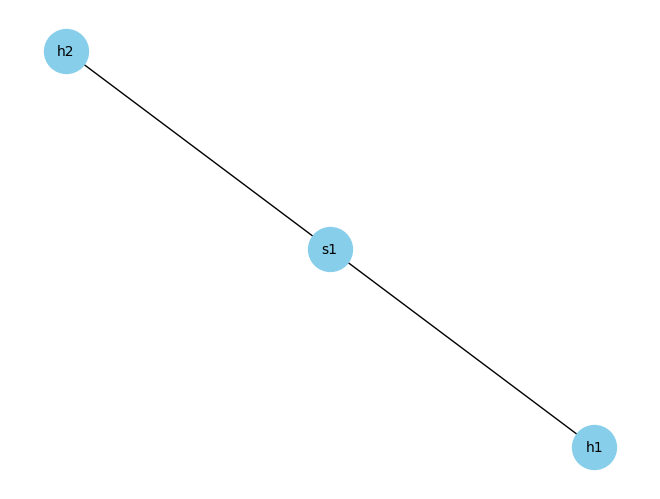

Telemetry Dataframe:
                 Metric       Scenario   Value
0  Throughput (Mbits/s)  Service Chain  12.600
1    Tracking Time (ms)  Service Chain   0.053
2       Total Time (ms)  Service Chain   0.053


In [29]:
def initialize_network():
    setLogLevel('info') 
    global net
    # Use OVS controller explicitly by specifying OVSController
    net = Mininet(topo=None, controller=OVSController, build=False)

    # Add the OVS controller
    net.addController('c0')

    # Add hosts with IP addresses
    h1 = net.addHost('h1', ip='10.0.0.1/24')  # Host 1 with IP 10.0.0.1
    h2 = net.addHost('h2', ip='10.0.0.2/24')  # Host 2 with IP 10.0.0.2

    # Add Open vSwitch
    s1 = net.addSwitch('s1', cls=OVSSwitch)

    # Add links between hosts and switch with bandwidth limit
    net.addLink(h1, s1, cls=TCLink, bw=10)  # 10 Mbps link
    net.addLink(h2, s1, cls=TCLink, bw=10)  # 10 Mbps link

    # Build and start the network
    net.build()
    net.start()

    print("Network initialized and started.")
    dumpNodeConnections(net.hosts)
     # Print host and switch resources
    print_host_resources(h1)
    print_switch_resources(s1)
    print("Starting telemetry collection...")
    scenario = "Service Chain"
    
    # Start iperf server on h1
    h1.cmd("iperf -s &")
    time.sleep(1)  # Wait for the server to initialize
    iperf_result = h2.cmd("iperf -c 10.0.0.1 -t 10 -i 1")  # Run iperf client from h2 to h1

    # Parse throughput from iperf result
    throughput = float(iperf_result.split("Mbits/sec")[0].split()[-1])

    # Track time with ping
    ping_result = h1.cmd("ping -c 10 10.0.0.2")  # Ping from h1 to h2
    avg_ping_time = parse_ping_result(ping_result)

    # Log telemetry data
    log_telemetry("Throughput (Mbits/s)", scenario, throughput)
    log_telemetry("Tracking Time (ms)", scenario, avg_ping_time)
    log_telemetry("Total Time (ms)", scenario, avg_ping_time)

    # Simulate periodic data collection
    time.sleep(0.5)

    # Stop the network and visualize the topology
    CLI(net)
    
    visualize_network(net)
    # Start the Mininet CLI interface
    #CLI(net)
    net.stop()
    return telemetry_data
    
# Re-run the initialization
initialize_network()

# Convert telemetry data to a DataFrame
df_local = pd.DataFrame(telemetry_data)
print("Telemetry Dataframe:")
print(df_local)  # Check the contents of the DataFrame


In [ ]:
from mininet.net import Mininet
from mininet.node import OVSSwitch, RemoteController
from mininet.link import TCLink
import time
import re  # Added for regex-based output parsing

from mininet.net import Mininet
from mininet.node import OVSSwitch, RemoteController
from mininet.link import TCLink
import time
import re  # For safer regex-based output parsing

# Create the network
net = Mininet(controller=RemoteController, switch=OVSSwitch, link=TCLink)

# Add hosts
h1 = net.addHost('h1', ip='10.0.0.1/24')
h2 = net.addHost('h2', ip='10.0.0.2/24')
h3 = net.addHost('h3', ip='10.0.0.3/24')

# Add switches
s1 = net.addSwitch('s1')
s2 = net.addSwitch('s2')
s3 = net.addSwitch('s3')

# Add links between hosts and switches
net.addLink(h1, s1)
net.addLink(h2, s2)
net.addLink(h3, s3)

# Add links between switches
net.addLink(s1, s2, delay='2ms')
net.addLink(s1, s3, delay='2ms')
net.addLink(s2, s3, delay='2ms')

# Add controller
controller_ip = '127.0.0.1'
controller_port = 6633
net.addController('c0', controller=RemoteController, ip=controller_ip, port=controller_port)

# Start the network
print("Starting network...")
net.start()

# Check if a controller is running
print("Checking if a controller is running at", controller_ip, "on port", controller_port, "...")
controller_check = net.controllers['c0'].ip
if not controller_check:
    print("⚠️ Warning: No controller detected. Ensure a controller (e.g., Ryu, ONOS) is running.")

# Wait for initialization
time.sleep(2)

# Start Iperf Server on h1
print("Starting iperf server on h1...")
h1.cmd('iperf -s &')
time.sleep(2)  # Give time for server to initialize

# Run Iperf client on h2
print("Running iperf client on h2...")
iperf_result = h2.cmd('iperf -c 10.0.0.1 -t 10 -i 1')

# Parse Iperf output
throughput_h2 = "N/A"
if "Mbits/sec" in iperf_result:
    match = re.findall(r"([\d\.]+) Mbits/sec", iperf_result)
    if match:
        throughput_h2 = match[-1]  # Last recorded throughput value

print("Iperf throughput result for h2:", throughput_h2, "Mbits/sec")

# Run Iperf client on h3
print("Running iperf client on h3...")
iperf_result_h3 = h3.cmd('iperf -c 10.0.0.1 -t 10 -i 1')

# Parse Iperf output for h3
throughput_h3 = "N/A"
if "Mbits/sec" in iperf_result_h3:
    match = re.findall(r"([\d\.]+) Mbits/sec", iperf_result_h3)
    if match:
        throughput_h3 = match[-1]

print("Iperf throughput result for h3:", throughput_h3, "Mbits/sec")

# Ping between h1 and h2
print("Testing ping between h1 and h2...")
ping_result_h1_h2 = h1.cmd('ping -c 4 10.0.0.2')

ping_time_h1_h2 = "N/A"
if "0% packet loss" in ping_result_h1_h2 and "time=" in ping_result_h1_h2:
    match = re.search(r"time=([\d\.]+) ms", ping_result_h1_h2)
    if match:
        ping_time_h1_h2 = match.group(1)

print("Ping result between h1 and h2:", ping_time_h1_h2, "ms")

# Ping between h1 and h3
print("Testing ping between h1 and h3...")
ping_result_h1_h3 = h1.cmd('ping -c 4 10.0.0.3')

ping_time_h1_h3 = "N/A"
if "0% packet loss" in ping_result_h1_h3 and "time=" in ping_result_h1_h3:
    match = re.search(r"time=([\d\.]+) ms", ping_result_h1_h3)
    if match:
        ping_time_h1_h3 = match.group(1)

print("Ping result between h1 and h3:", ping_time_h1_h3, "ms")

# Collect and log telemetry data
telemetry_data = [
    {'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h2', 'Value': throughput_h2},
    {'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h3', 'Value': throughput_h3},
    {'Metric': 'Tracking Time (ms)', 'Scenario': 'h1 to h2', 'Value': ping_time_h1_h2},
    {'Metric': 'Tracking Time (ms)', 'Scenario': 'h1 to h3', 'Value': ping_time_h1_h3},
]

# Log telemetry data
print("\n📊 Telemetry Data:")
for data in telemetry_data:
    print(data)

# Display network connections
print("\n🔗 Network connections:")
for link in net.links:
    print(link)

# Stop the network
print("\n🛑 Stopping network...")
net.stop()


In [ ]:
def initialize_testbed():
    """Initialize and run the Mininet testbed."""
    global net
    setLogLevel('info') 
    
    # Create Mininet instance
    net = Mininet(controller = OVSController, switch=OVSSwitch, link=TCLink, build=False)
    
    # Add OVS controller
    c0 = net.addController('c0')
    c1 = net.addController('c1')
    for controller in net.controllers:
        print(controller.name, controller.IP())

    # Add hosts with simulated CPU constraints
    h1 = net.addHost('h1', ip='10.0.0.1/24', cpu=0.004)
    h2 = net.addHost('h2', ip='10.0.0.2/24', cpu=0.002)
    h3 = net.addHost('h3', ip='10.0.0.3/24', cpu=0.001)

    # Add switches
    s1 = net.addSwitch('s1',cls=OVSSwitch,protocols='OpenFlow10')
    s2 = net.addSwitch('s2',cls=OVSSwitch,protocols='OpenFlow10')
    s3 = net.addSwitch('s3',cls=OVSSwitch,protocols='OpenFlow10')

    # Add links with 10 Mbps bandwidth
    net.addLink(h1, s1, cls=TCLink, bw=10)
    net.addLink(h2, s2, cls=TCLink, bw=10)
    net.addLink(h3, s3, cls=TCLink, bw=10)

    # Switch-to-Switch Links
    net.addLink(s1, s2, cls=TCLink, bw=10, delay='2ms')
    net.addLink(s2, s3, cls=TCLink, bw=10, delay='2ms')
    net.addLink(s3, s1, cls=TCLink, bw=10, delay='2ms')

    # Build and start the network
    net.build()
    net.start()

    print("Controller Information:")
    print(net.controller)

    # Dump node connections
    print("Network Topology:")
    print(dumpNodeConnections(net.hosts))

    # Print host and switch resources
    print_host_resources(h1)
    print_switch_resources(s1)

    # Simulate telemetry collection
    print("Starting telemetry collection...")
    scenario = "Service Chain"
    
    # Start iperf server on h1
    print(h1.cmd("ifconfig"))
    # print(s1.cmd("ifconfig"))
    h1.cmd("iperf -s &")
    time.sleep(10)  # Wait for server initialization
    
    # Run iperf client from h2 to h1
    iperf_result = h2.cmd("iperf -c 10.0.0.1 -t 10 -i 1")
    throughput = parse_iperf_throughput(iperf_result)
    log_telemetry("Throughput (Mbits/s)", "Service Chain", throughput)
    
    # Test connectivity and ping RTT
    print("Testing connectivity between h1 and h2...")
    if "time=" in ping_result_h1_h2:
        match = re.search(r"time=([\d\.]+) ms", ping_result_h1_h2)
        if match:
            ping_time_h1_h2 = match.group(1))
    print("Ping Result:")
    print(ping_result)
    
    avg_ping_time = parse_ping_result(ping_result)
    if avg_ping_time is not None:
        log_telemetry("Tracking Time (ms)", "Service Chain", avg_ping_time)
        log_telemetry("Total Time (ms)", "Service Chain", avg_ping_time)
    else:
        print("Error extracting RTT. Check connectivity.")

    # Log telemetry data
    log_telemetry("Throughput (Mbits/s)", scenario, throughput)
    log_telemetry("Tracking Time (ms)", scenario, avg_ping_time)
    log_telemetry("Total Time (ms)", scenario, avg_ping_time)

    # Simulate periodic data collection
    time.sleep(0.5)

    # Stop the network and visualize the topology
    CLI(net)
    visualize_network(net)
    net.stop()

    # Return telemetry data
    return telemetry_data

# Run the testbed setup
telemetry_data2 = initialize_testbed()

# Convert telemetry data to a DataFrame
df = pd.DataFrame(telemetry_data2)
print("Telemetry Dataframe:")
print(df)  # Check the contents of the DataFrame

c0 127.0.0.1
c1 127.0.0.1


h1 h1-eth0:s1-eth1
h2 h2-eth0:s2-eth1
h3 h3-eth0:s3-eth1


Controller Information:
<class 'mininet.node.OVSController'>
Network Topology:
None
Resources for Host h1:
CPU Usage (top):
top - 22:03:48 up  5:45,  3 users,  load average: 2.09, 1.91, 0.88
Tasks: 281 total,   1 running, 154 sleeping,   0 stopped, 126 zombie
%Cpu(s): 28.6 us, 23.8 sy,  0.0 ni, 47.6 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st 
MiB Mem :   7938.2 total,   4631.5 free,    880.3 used,   2748.6 buff/cache     
MiB Swap:      0.0 total,      0.0 free,      0.0 used.   7057.9 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU  %MEM     TIME+ COMMAND
    578 root      10 -10  385604  62460  13824 S  50.0   0.8  12:37.61 ovs-vsw+
  38177 root      20   0   10948   4736   3968 S  30.0   0.1   0:00.06 ovs-tes+
    134 root      19  -1  140704  82516  81236 S  20.0   1.0   0:33.99 systemd+

Memory Usage (free):
               total        used        free      shared  buff/cache   available
Mem:           7.8Gi       879Mi       4.5Gi       988Ki       2.7Gi       6.9G

In [25]:
import socket
import time
import re
from mininet.net import Mininet
from mininet.node import OVSSwitch, RemoteController
from mininet.link import TCLink

# Controller details
controller_ip = '127.0.0.1'
controller_port = 6633

def check_controller(ip, port):
    """Check if a remote controller is running."""
    try:
        with socket.create_connection((ip, port), timeout=2) as sock:
            print(f"✅ Controller is running at {ip}:{port}")
            return True
    except (socket.timeout, ConnectionRefusedError):
        print(f"❌ No controller detected at {ip}:{port}. Please start it before running Mininet.")
        return False

# Check controller before starting Mininet
if not check_controller(controller_ip, controller_port):
    exit(1)  # Exit if no controller is detected

# Create the Mininet network
net = Mininet(controller=RemoteController, switch=OVSSwitch, link=TCLink)

# Add hosts
h1 = net.addHost('h1', ip='10.0.0.1/24')
h2 = net.addHost('h2', ip='10.0.0.2/24')
h3 = net.addHost('h3', ip='10.0.0.3/24')

# Add switches
s1 = net.addSwitch('s1')
s2 = net.addSwitch('s2')
s3 = net.addSwitch('s3')

# Add links between hosts and switches
net.addLink(h1, s1)
net.addLink(h2, s2)
net.addLink(h3, s3)

# Add links between switches
net.addLink(s1, s2, delay='2ms')
net.addLink(s1, s3, delay='2ms')
net.addLink(s2, s3, delay='2ms')

# Add the remote controller
net.addController('c0', controller=RemoteController, ip=controller_ip, port=controller_port)

# Start the network
print("\n🚀 Starting Mininet network...")
net.start()

# Verify switch connections
print("\n🔍 Checking if switches are connected to the controller...")
for switch in net.switches:
    result = switch.cmd("ovs-vsctl show")
    if "is_connected: true" in result:
        print(f"✅ {switch.name} is connected to the controller.")
    else:
        print(f"⚠️ {switch.name} is NOT connected to the controller. Check the controller setup!")

# Wait for network initialization
time.sleep(2)

# Start Iperf server on h1
print("\n📡 Starting iperf server on h1...")
h1.cmd('iperf -s &')
time.sleep(2)  # Give time for server to initialize

# Run Iperf client on h2
print("\n⚡ Running iperf client on h2...")
iperf_result = h2.cmd('iperf -c 10.0.0.1 -t 10 -i 1')

# Parse Iperf output
throughput_h2 = "N/A"
if "Mbits/sec" in iperf_result:
    match = re.findall(r"([\d\.]+) Mbits/sec", iperf_result)
    if match:
        throughput_h2 = match[-1]  # Last recorded throughput value

print(f"📊 Iperf throughput h2 -> h1: {throughput_h2} Mbits/sec")

# Run Iperf client on h3
print("\n⚡ Running iperf client on h3...")
iperf_result_h3 = h3.cmd('iperf -c 10.0.0.1 -t 10 -i 1')

# Parse Iperf output for h3
throughput_h3 = "N/A"
if "Mbits/sec" in iperf_result_h3:
    match = re.findall(r"([\d\.]+) Mbits/sec", iperf_result_h3)
    if match:
        throughput_h3 = match[-1]

print(f"📊 Iperf throughput h3 -> h1: {throughput_h3} Mbits/sec")

# Ping between h1 and h2
print("\n🔄 Testing ping between h1 and h2...")
ping_result_h1_h2 = h1.cmd('ping -c 4 10.0.0.2')

ping_time_h1_h2 = "N/A"
if "0% packet loss" in ping_result_h1_h2:
    match = re.search(r"time=([\d\.]+) ms", ping_result_h1_h2)
    if match:
        ping_time_h1_h2 = match.group(1)

print(f"📊 Ping h1 -> h2: {ping_time_h1_h2} ms")

# Ping between h1 and h3
print("\n🔄 Testing ping between h1 and h3...")
ping_result_h1_h3 = h1.cmd('ping -c 4 10.0.0.3')

ping_time_h1_h3 = "N/A"
if "0% packet loss" in ping_result_h1_h3:
    match = re.search(r"time=([\d\.]+) ms", ping_result_h1_h3)
    if match:
        ping_time_h1_h3 = match.group(1)

print(f"📊 Ping h1 -> h3: {ping_time_h1_h3} ms")

# Display telemetry data
telemetry_data = [
    {'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h2', 'Value': throughput_h2},
    {'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h3', 'Value': throughput_h3},
    {'Metric': 'Ping Time (ms)', 'Scenario': 'h1 to h2', 'Value': ping_time_h1_h2},
    {'Metric': 'Ping Time (ms)', 'Scenario': 'h1 to h3', 'Value': ping_time_h1_h3},
]

print("\n📊 Final Telemetry Data:")
for data in telemetry_data:
    print(data)

# Show network connections
print("\n🔗 Network connections:")
for link in net.links:
    print(link)

# Stop the network
print("\n🛑 Stopping network...")
net.stop()


❌ No controller detected at 127.0.0.1:6633. Please start it before running Mininet.


Unable to contact the remote controller at 127.0.0.1:6633



🚀 Starting Mininet network...

🔍 Checking if switches are connected to the controller...
⚠️ s1 is NOT connected to the controller. Check the controller setup!
⚠️ s2 is NOT connected to the controller. Check the controller setup!
⚠️ s3 is NOT connected to the controller. Check the controller setup!

📡 Starting iperf server on h1...

⚡ Running iperf client on h2...
📊 Iperf throughput h2 -> h1: N/A Mbits/sec

⚡ Running iperf client on h3...
📊 Iperf throughput h3 -> h1: N/A Mbits/sec

🔄 Testing ping between h1 and h2...
📊 Ping h1 -> h2: N/A ms

🔄 Testing ping between h1 and h3...
📊 Ping h1 -> h3: N/A ms

📊 Final Telemetry Data:
{'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h2', 'Value': 'N/A'}
{'Metric': 'Throughput (Mbits/s)', 'Scenario': 'h1 to h3', 'Value': 'N/A'}
{'Metric': 'Ping Time (ms)', 'Scenario': 'h1 to h2', 'Value': 'N/A'}
{'Metric': 'Ping Time (ms)', 'Scenario': 'h1 to h3', 'Value': 'N/A'}

🔗 Network connections:
h1-eth0<->s1-eth1
h2-eth0<->s2-eth1
h3-eth0<->s3-eth1
s

In [ ]:
# Initialize testbed and collect telemetry data
telemetry_data = initialize_testbed()

# Convert telemetry to DataFrame
df = pd.DataFrame(telemetry_data)

# Confidence Interval Calculation
def compute_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    n = len(data)
    error = sem(data)
    h = error * t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

# Compute metrics and intervals
results = []

for metric in df["Metric"].unique():
    subset = df[df["Metric"] == metric]
    mean, lower, upper = compute_confidence_interval(subset["Value"])
    results.append({"Metric": metric, "Mean": mean, "Lower": lower, "Upper": upper})

results_df = pd.DataFrame(results)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

for i, metric in enumerate(df["Metric"].unique(), 1):
    plt.subplot(2, 2, i)
    metric_data = df[df["Metric"] == metric]
    sns.histplot(metric_data["Value"], kde=True, bins=10, color="blue", label=metric)
    plt.axvline(x=metric_data["Value"].mean(), color="red", linestyle="--", label="Mean")
    plt.title(f"{metric}")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

### Stop the Network

# FLUSH

In [23]:
import p4runtime_pb2
print(p4runtime_pb2.__file__)


TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [13]:
import os

os.system('ip link show')

# Clean up existing network interfaces
os.system('sudo ip link set h1-eth0 down')
os.system('sudo ip link set h2-eth0 down')
os.system('sudo ip link delete h1-eth0')
os.system('sudo ip link delete h2-eth0')
os.system('sudo ip link delete s1-eth1')
os.system('sudo ip link delete s1-eth2')
os.system('sudo pkill -f simple_switch_CLI')
os.system('sudo pkill -f simple_switch')


# Reset Mininet
os.system('sudo mn -c')


# Check if interfaces are still lingering (Optional)
os.system('ip link show')

# Now you can proceed with your Mininet setup and run the script again


1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: ens5: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9001 qdisc mq state UP mode DEFAULT group default qlen 1000
    link/ether 06:af:a9:75:9e:6b brd ff:ff:ff:ff:ff:ff


Cannot find device "h1-eth0"
Cannot find device "h2-eth0"
Cannot find device "h1-eth0"
Cannot find device "h2-eth0"
Cannot find device "s1-eth1"
Cannot find device "s1-eth2"
*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null


1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN mode DEFAULT group default qlen 1000
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
2: ens5: <BROADCAST,MULTICAST,UP,LOWER_UP> mtu 9001 qdisc mq state UP mode DEFAULT group default qlen 1000
    link/ether 06:af:a9:75:9e:6b brd ff:ff:ff:ff:ff:ff


killall -9 controller ofprotocol ofdatapath ping nox_corelt-nox_core ovs-openflowd ovs-controllerovs-testcontroller udpbwtest mnexec ivs ryu-manager 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup complete.


0

In [11]:
import subprocess
import os

# File paths
p4_file = "/home/ubuntu/simple.p4"
p4info_file = "/home/ubuntu/simple.p4info.txtpb"  # Changed extension to .txtpb
json_file = "/home/ubuntu/simple.json"
include_path = "/usr/local/share/p4c/p4include/"

# Ensure output directory exists
output_dir = os.path.dirname(json_file)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Compile command
compile_cmd = [
    "p4c", "--target", "bmv2", "--arch", "v1model",
    "-I", include_path,
    "--p4runtime-files", p4info_file,
    "--output", json_file, p4_file
]

try:
    print("Starting P4 compilation...")
    subprocess.check_call(compile_cmd)
    print(f"Successfully compiled P4 program: {p4_file}")
    print(f"Output JSON file: {json_file}")
    print(f"P4Runtime file: {p4info_file}")
except subprocess.CalledProcessError as e:
    print(f"Compilation failed with error code {e.returncode}")
    print(f"Error message: {e}")
except FileNotFoundError:
    print("Error: p4c compiler not found. Please ensure it's installed and in your PATH")

Starting P4 compilation...
Successfully compiled P4 program: /home/ubuntu/simple.p4
Output JSON file: /home/ubuntu/simple.json
P4Runtime file: /home/ubuntu/simple.p4info.txtpb


In [12]:
# First let's write the contents of the script
%%writefile /home/ubuntu/run_network.py
from mininet.net import Mininet
from mininet.topo import Topo
from mininet.log import setLogLevel, info
from mininet.cli import CLI
from mininet.node import Node
from p4runtime_lib.switch import ShutdownAllSwitchConnections
from p4runtime_lib.helper import P4InfoHelper
from p4runtime_lib.switch import SwitchConnection
import os
import sys
import subprocess
import time

class SingleSwitchTopo(Topo):
    def __init__(self, n=2, **opts):
        Topo.__init__(self, **opts)
        switch = self.addSwitch('s1')
        for h in range(n):
            host = self.addHost(f'h{h+1}',
                              ip=f"10.0.{h+1}.{h+1}/24",
                              mac=f"00:00:00:00:0{h+1}:0{h+1}")
            self.addLink(host, switch)

def program_switch():
    p4info_helper = P4InfoHelper("/home/ubuntu/simple.p4info.txtpb")

    try:
        s1 = SwitchConnection(
            name='s1',
            address='127.0.0.1:50051',
            device_id=1,
            proto_dump_file='logs/p4runtime-requests.txt'
        )

        s1.MasterArbitrationUpdate()

        s1.SetForwardingPipelineConfig(p4info=p4info_helper.p4info,
                                     bmv2_json_file_path="/home/ubuntu/simple.json")

        # Write forwarding rules
        table_entry = p4info_helper.buildTableEntry(
            table_name="MyIngress.ipv4_lpm",
            match_fields={
                "hdr.ipv4.dstAddr": ("10.0.1.1", 32)
            },
            action_name="MyIngress.ipv4_forward",
            action_params={
                "dstAddr": "00:00:00:00:01:01",
                "port": 1
            })
        s1.WriteTableEntry(table_entry)

        table_entry = p4info_helper.buildTableEntry(
            table_name="MyIngress.ipv4_lpm",
            match_fields={
                "hdr.ipv4.dstAddr": ("10.0.2.2", 32)
            },
            action_name="MyIngress.ipv4_forward",
            action_params={
                "dstAddr": "00:00:00:00:02:02",
                "port": 2
            })
        s1.WriteTableEntry(table_entry)

        return s1

    except Exception as e:
        print(f"Error: {str(e)}")
        return None

def main():
    setLogLevel('info')

    # Create network
    topo = SingleSwitchTopo()
    net = Mininet(topo)
    
    # Start network
    net.start()

    # Start P4 switch
    switch_cmd = [
        'simple_switch_grpc',
        '--no-p4',
        '--dump-packet-data',
        '/home/ubuntu/simple.json',
        '--device-id', '1',
        '--grpc-server-addr', '0.0.0.0:50051',
        '--log-console'
    ]
    
    # Give the switch time to start
    print("Waiting for switch to start...")
    time.sleep(2)

    # Program the switch
    print("Programming switch...")
    switch_connection = program_switch()
    if switch_connection is None:
        print("Failed to program switch")
        net.stop()
        return

    # Configure hosts
    h1, h2 = net.get('h1'), net.get('h2')
    h1.cmd('arp -s 10.0.2.2 00:00:00:00:02:02')
    h2.cmd('arp -s 10.0.1.1 00:00:00:00:01:01')

    print("Network is ready!")
    print("Try: h1 ping h2")
    
    CLI(net)
    
    # Clean up
    if switch_connection:
        ShutdownAllSwitchConnections()
    net.stop()

if __name__ == '__main__':
    main()

UsageError: Line magic function `%%writefile` not found.


In [15]:
!sudo python3 /home/ubuntu/run_network.py

Traceback (most recent call last):
  File "/home/ubuntu/run_network.py", line 8, in <module>
    from p4runtime_lib.switch import ShutdownAllSwitchConnections
ModuleNotFoundError: No module named 'p4runtime_lib'


In [16]:
!pip list

DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/thrift-0.13.0-py3.12-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Package             Version
------------------- --------------
attrs               23.2.0
Automat             22.10.0
Babel               2.10.3
bcc                 0.29.1
bcrypt              3.2.2
blinker             1.7.0
boto3               1.34.46
botocore            1.34.46
certifi             2023.11.17
chardet             5.2.0
click               8.1.6
cloud-init          24.3.1
colorama            0.4.6
command-not-found   0.3
configobj           5.0.8
constantly          23.10.4
cryptography        41.0.7
dbus-python         1.3.2
distro              1.9.0
distro-info         1.7+build1
ec2-hibinit-agent   1.0.0
hibagent            1.0.1
httplib2            0.20.4
hyperlink          

In [18]:
import sys
sys.path.append('/home/ubuntu/tutorials/utils/')

# Also add the p4runtime path explicitly
sys.path.append('/home/ubuntu/p4runtime/py')

print("Modified Python path:")
for path in sys.path:
    print(path)

# Let's verify our imports
try:
    from p4runtime_lib.switch import SwitchConnection
    from p4runtime_lib.helper import P4InfoHelper
    import p4.v1.p4runtime_pb2 as p4runtime_pb2
    import p4.v1.p4runtime_pb2_grpc as p4runtime_pb2_grpc
    print("Successfully imported all required P4Runtime modules")
except ImportError as e:
    print(f"Import error: {e}")

Modified Python path:
/home/ubuntu/miniconda3/envs/p4dev/lib/python38.zip
/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8
/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/lib-dynload

/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages
/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages/IPython/extensions
/root/.ipython
/home/ubuntu/miniconda3/envs/p4dev/lib/python3.8/site-packages/setuptools/_vendor
/home/ubuntu/p4runtime/py/p4/v1
/home/ubuntu/tutorials/utils/
/home/ubuntu/p4runtime/py
Import error: No module named 'p4runtime_lib'


In [19]:
!ls -l /home/ubuntu/tutorials/

ls: cannot access '/home/ubuntu/tutorials/': No such file or directory


In [20]:
!echo $P4_TUTORIALS_PATH

In [21]:
!find /home/ubuntu -name "p4runtime_lib" 2>/dev/null